Simulated event times: [0.032373527145431104, 0.23164781521645073, 1.330709889774885, 1.4070413963807842, 1.9982486512744575, 3.042299189482155, 3.4080354779663073, 3.54988307994945, 4.6345642030422365, 4.915348840583749, 4.951094534653497, 5.137664287466966, 5.408683001459482, 5.800656334080513, 5.961104702714726, 6.932851329617797, 6.980623919031426, 7.6527549158203945, 7.97041027465568, 8.058366970510594, 8.432292851161455, 8.448339167851996, 8.476113423612537, 8.937909179648633, 9.49341217197866, 9.641596011482546, 9.678927235501238]


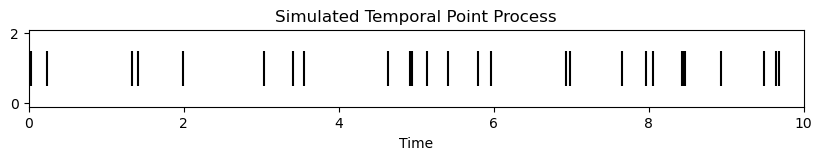

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class ThinningAlgorithm:
    def __init__(self, time_horizon, upper_bound_rate, kernel=None):
        self.time_horizon = time_horizon
        self.upper_bound_rate = upper_bound_rate
        if kernel is None:
            # Default to exponential kernel with decay parameter 1.0
            self.kernel = lambda t: np.exp(-t)
        else:
            self.kernel = kernel

    def simulate(self):
        events = []
        current_time = 0

        while current_time < self.time_horizon:
            # Sample the next candidate event time from a Poisson process with the upper bound rate
            inter_event_time = np.random.exponential(1 / self.upper_bound_rate)
            current_time += inter_event_time

            if current_time >= self.time_horizon:
                break

            # Compute the intensity at the current time
            intensity = self.kernel(current_time - np.array(events)).sum() if events else 0
            mu = 1.0  # Baseline intensity
            total_intensity = mu + intensity

            # Accept the candidate event with probability proportional to the current intensity
            if np.random.uniform(0, 1) < total_intensity / self.upper_bound_rate:
                events.append(current_time)

        return events

# Function to simulate a temporal point process using the thinning algorithm
def simulate_temporal_point_process(time_horizon, upper_bound_rate, kernel=None):
    thinning_algorithm = ThinningAlgorithm(time_horizon, upper_bound_rate, kernel)
    return thinning_algorithm.simulate()

# Example usage
time_horizon = 10.0
upper_bound_rate = 5.0  # Upper bound of the rate
events = simulate_temporal_point_process(time_horizon, upper_bound_rate)
print("Simulated event times:", events)

# Plotting the event times
plt.figure(figsize=(10, 1))
plt.eventplot(events, orientation='horizontal', colors='black')
plt.xlim(0, time_horizon)
plt.xlabel('Time')
plt.title('Simulated Temporal Point Process')
plt.show()


Simulated event times: [1.8123, 2.7819000000000003, 2.8379000000000003, 3.3088, 3.3226, 3.5534000000000003, 3.5624000000000002, 3.5927000000000002, 3.5984000000000003, 3.7129000000000003, 3.9848000000000003, 4.115200000000001, 4.2006000000000006, 4.7568, 4.9707, 5.008900000000001, 5.1153, 5.4626, 5.7034, 5.7889, 5.9604, 6.1363, 6.346900000000001, 6.4049000000000005, 6.4664, 6.5106, 6.6196, 6.6612, 6.712400000000001, 7.1005, 7.2128000000000005, 7.4238, 7.5549, 7.7506, 8.3671, 8.440100000000001, 8.491900000000001, 8.717500000000001, 8.8298, 8.9679, 9.302900000000001, 9.352400000000001, 9.4604, 9.921700000000001]


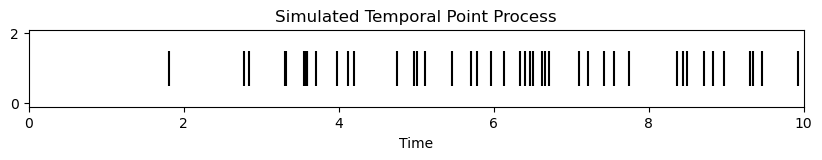

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class DiscreteTimeThinningAlgorithm:
    def __init__(self, time_horizon, upper_bound_rate, delta=0.001, kernel=None):
        self.time_horizon = time_horizon
        self.upper_bound_rate = upper_bound_rate
        self.delta = delta
        if kernel is None:
            # Default to exponential kernel with decay parameter 1.0
            self.kernel = lambda t: np.exp(-t)
        else:
            self.kernel = kernel

    def simulate(self):
        events = []
        num_intervals = int(self.time_horizon / self.delta)
        potential_events = []

        # Step 1: Generate potential events using the base process
        for i in range(num_intervals):
            current_time = i * self.delta
            if np.random.uniform(0, 1) < self.delta * self.upper_bound_rate:
                potential_events.append(current_time)

        # Step 2: Thinning
        for event_time in potential_events:
            intensity = self.kernel(event_time - np.array(events)).sum() if events else 0
            mu = 1.0  # Baseline intensity
            total_intensity = mu + intensity

            # Accept the candidate event with probability proportional to the current intensity
            if np.random.uniform(0, 1) < total_intensity / self.upper_bound_rate:
                events.append(event_time)

        return events

# Function to simulate a temporal point process using the discrete-time thinning algorithm
def simulate_temporal_point_process(time_horizon, upper_bound_rate, delta=0.001, kernel=None):
    thinning_algorithm = DiscreteTimeThinningAlgorithm(time_horizon, upper_bound_rate, delta, kernel)
    return thinning_algorithm.simulate()

# Example usage
time_horizon = 10.0
upper_bound_rate = 5.0  # Upper bound of the rate
delta = 0.0001  # Interval size
events = simulate_temporal_point_process(time_horizon, upper_bound_rate, delta)
print("Simulated event times:", events)

# Plotting the event times
plt.figure(figsize=(10, 1))
plt.eventplot(events, orientation='horizontal', colors='black')
plt.xlim(0, time_horizon)
plt.xlabel('Time')
plt.title('Simulated Temporal Point Process')
plt.show()
